# Лабораторная №4. Работа с классификацией данных при помощи scikit-learn. Построение модели машинного обучения методом k-средних.

In [ ]:
from sklearn.datasets import load_digits, load_wine, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


### 1. Изучение данных

In [ ]:
datasets = {
    "Digits": load_digits(),
    "Wine": load_wine(),
    "Breast Cancer": load_breast_cancer()
}

In [ ]:
for key, value in datasets.items():
    print(f"Keys of {key} dataset: {value.keys()}")

Keys of Digits dataset: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
Keys of Wine dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
Keys of Breast Cancer dataset: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
data = {
    "Dataset": [],
    "Shape": [],
    "Samples": [],
    "Features": [],
    "Feature Names": [],
    "Target Names": [],
    "Min Value": [],
    "Max Value": [],
    "Mean Value": [],
    "Description (begin)": []
}

for key, value in datasets.items():
    data["Dataset"].append(key)
    data["Shape"].append(value['data'].shape)
    data["Samples"].append(value['data'].shape[0])
    data["Features"].append(value['data'].shape[1])
    data["Feature Names"].append(", ".join(value['feature_names'][:5]) + "...")
    data["Target Names"].append(", ".join(map(str, value['target_names'])) if 'target_names' in value else "N/A")  # метки классов
    data["Min Value"].append(np.min(value['data']))
    data["Max Value"].append(np.max(value['data']))
    data["Mean Value"].append(np.mean(value['data']).round(2))
    data["Description (begin)"].append(value['DESCR'][:300] + "...")

df = pd.DataFrame(data)
df

Dataset       Shape  Samples  Features  \
0         Digits  (1797, 64)     1797        64   
1           Wine   (178, 13)      178        13   
2  Breast Cancer   (569, 30)      569        30   

                                       Feature Names  \
0  pixel_0_0, pixel_0_1, pixel_0_2, pixel_0_3, pi...   
1  alcohol, malic_acid, ash, alcalinity_of_ash, m...   
2  mean radius, mean texture, mean perimeter, mea...   

                   Target Names  Min Value  Max Value  Mean Value  \
0  0, 1, 2, 3, 4, 5, 6, 7, 8, 9       0.00       16.0        4.88   
1     class_0, class_1, class_2       0.13     1680.0       69.13   
2             malignant, benign       0.00     4254.0       61.89   

                                 Description (begin)  
0  .. _digits_dataset:\n\nOptical recognition of ...  
1  .. _wine_dataset:\n\nWine recognition dataset\...  
2  .. _breast_cancer_dataset:\n\nBreast cancer wi...

In [ ]:
for key, value in datasets.items():
    print(f"First 10 rows of {key}:\n {value['data'][:10]}")

First 10 rows of Digits:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  

In [ ]:
for key, value in datasets.items():
  print(f"Target of {key} dataset:\n{value['target']}")

Target of Digits dataset:
[0 1 2 ... 8 9 8]
Target of Wine dataset:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Target of Breast Cancer dataset:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0

### 2. Разделение данных на тестовые и обучающие наборы

In [ ]:
digits_dataset = datasets['Digits']
X_d, y_d = digits_dataset.data, digits_dataset.target
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=0)

digits_dataframe = pd.DataFrame(X_train_d, columns=digits_dataset.feature_names)
digits_dataframe['target'] = y_train_d

In [ ]:
cancer_ds = datasets['Breast Cancer']
X_c, y_c = cancer_ds.data, cancer_ds.target
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.2, random_state=0)

cancer_dataframe = pd.DataFrame(X_train_c, columns=cancer_ds.feature_names)
cancer_dataframe['target'] = y_train_c

In [ ]:
wine_ds = datasets['Wine']
X_w, y_w = wine_ds.data, wine_ds.target
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_w, y_w, test_size=0.2, random_state=0)

wine_dataframe = pd.DataFrame(X_train_w, columns=wine_ds.feature_names)
wine_dataframe['target'] = y_train_w

### 3. Исследование данных с помощью визуализации. Построение модели KNN, прогноз и оценка качества модели

<Figure size 1200x1200 with 0 Axes>

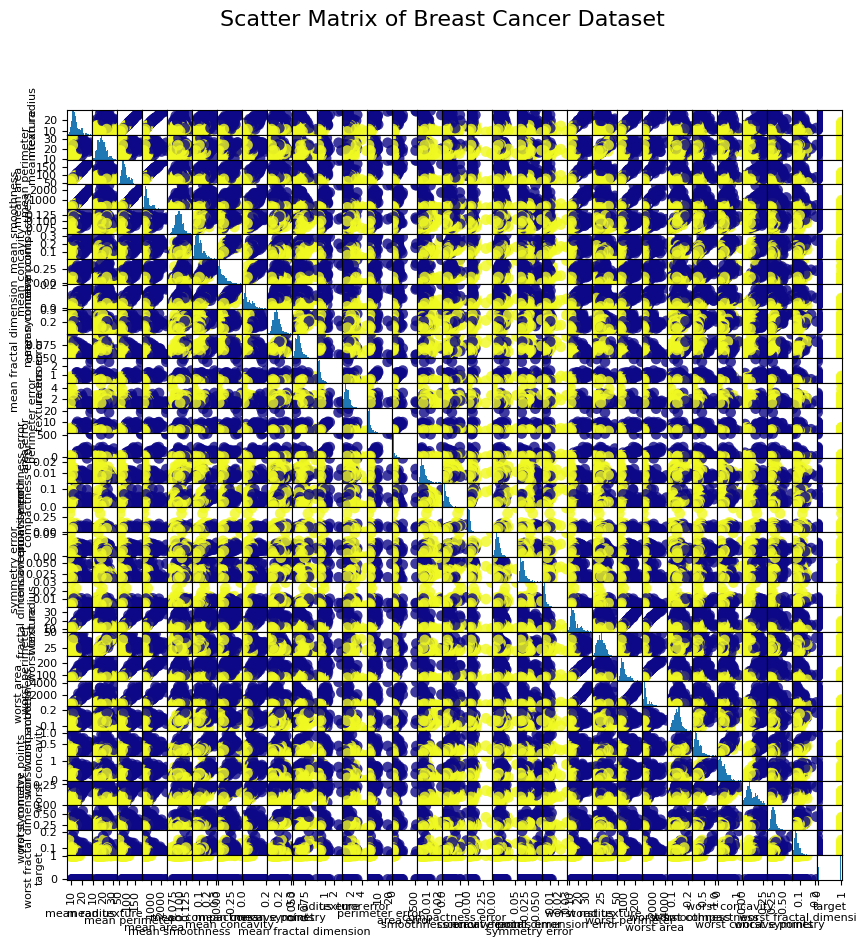

Accuracy: 0.9122807017543859

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90        47
           1       0.94      0.91      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

Confusion Matrix:
 [[43  4]
 [ 6 61]]


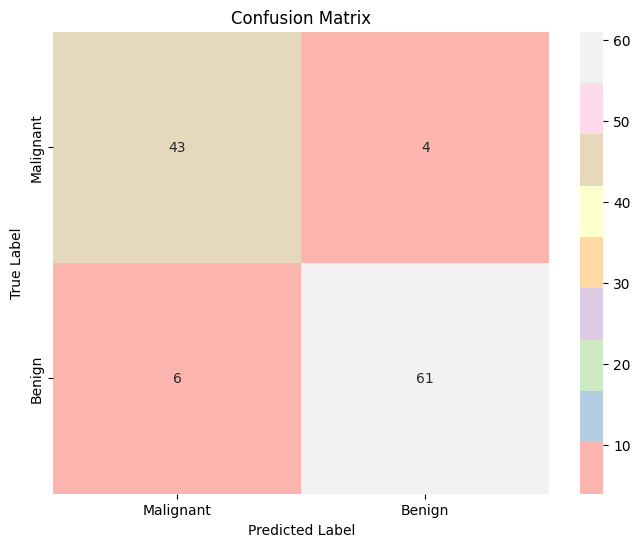

In [ ]:
plt.figure(figsize=(12, 12))
scatter_matrix_c = pd.plotting.scatter_matrix(cancer_dataframe, c=y_train_c, figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap='plasma')

for ax in scatter_matrix_c.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

plt.suptitle('Scatter Matrix of Breast Cancer Dataset', fontsize=16)
plt.show()

# Обучение модели KNN
knn_c = KNeighborsClassifier(n_neighbors=3)
knn_c.fit(X_train_c, y_train_c)

# Предсказание и оценка модели
y_pred_c = knn_c.predict(X_test_c)
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Pastel1', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<Figure size 1600x1600 with 0 Axes>

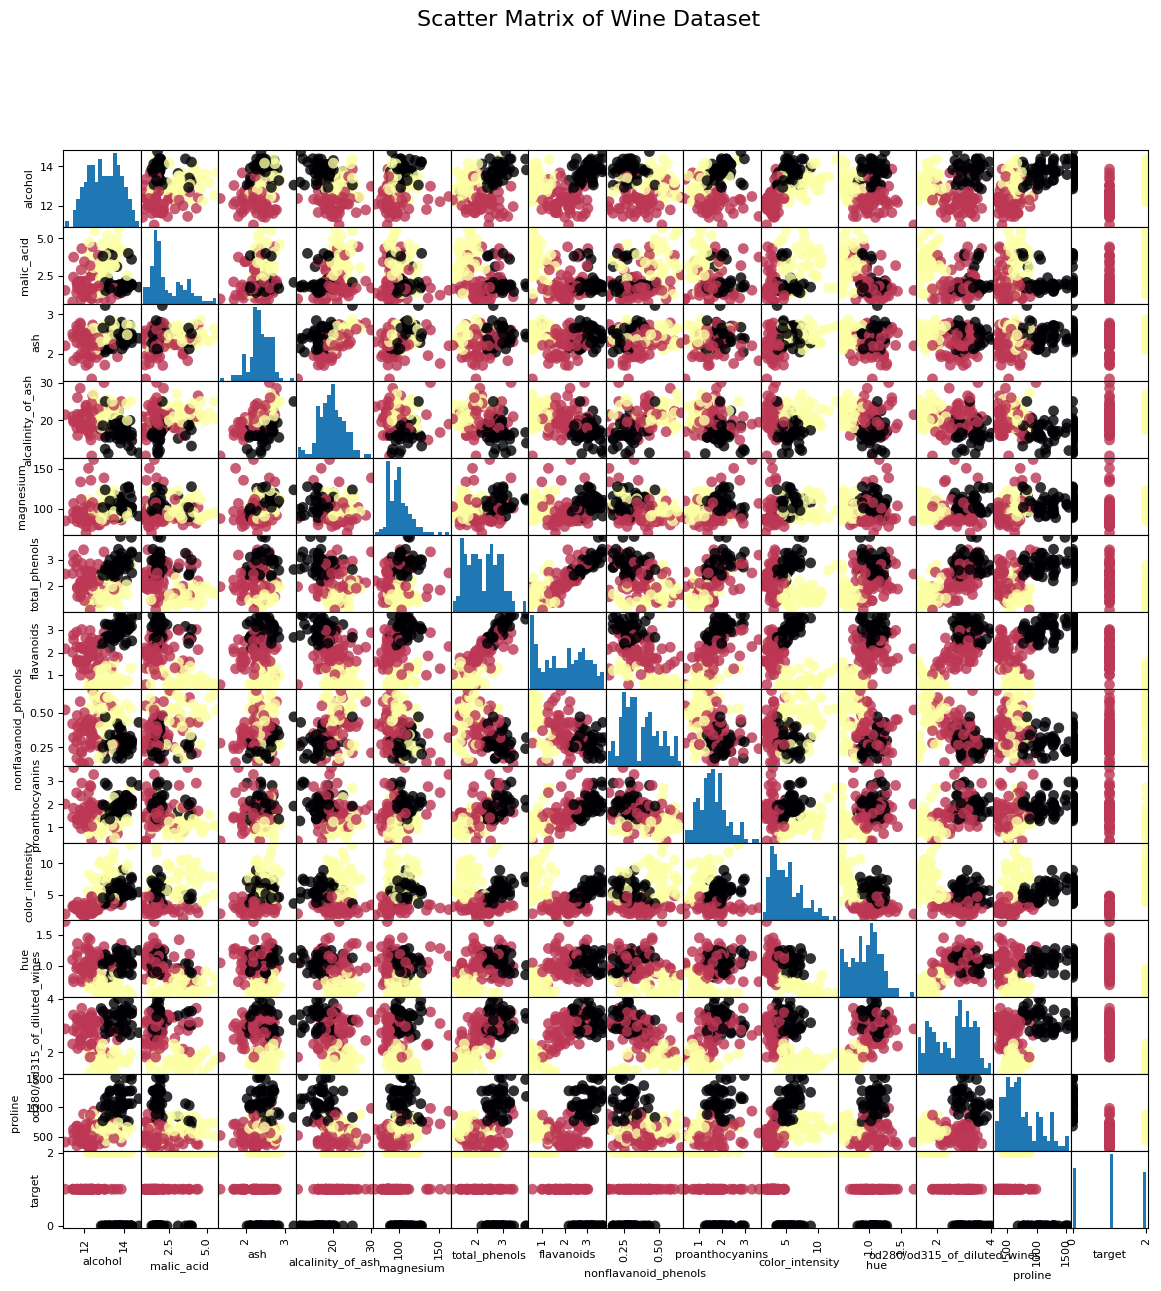

Accuracy: 0.7777777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.81      0.81      0.81        16
           2       0.40      0.33      0.36         6

    accuracy                           0.78        36
   macro avg       0.69      0.69      0.69        36
weighted avg       0.76      0.78      0.77        36

Confusion Matrix:
 [[13  0  1]
 [ 1 13  2]
 [ 1  3  2]]


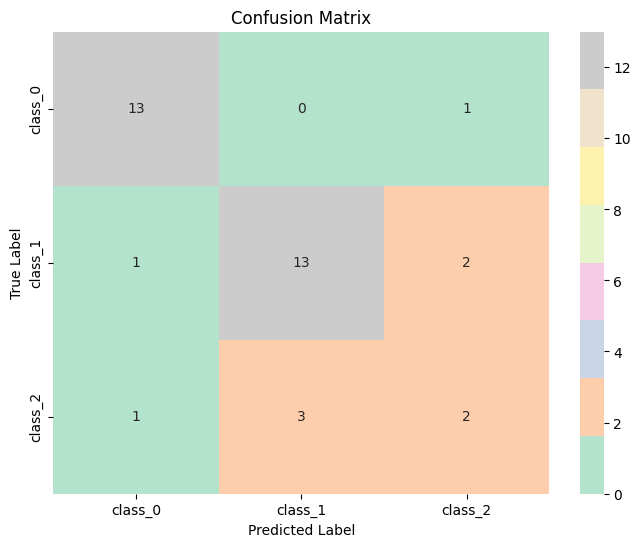

In [ ]:
plt.figure(figsize=(16, 16))
scatter_matrix_w = pd.plotting.scatter_matrix(wine_dataframe, c=y_train_w, figsize=(14, 14),marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap='inferno')

for ax in scatter_matrix_w.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

plt.suptitle('Scatter Matrix of Wine Dataset', fontsize=16)
plt.show()

knn_w = KNeighborsClassifier(n_neighbors=3)
knn_w.fit(X_train_w, y_train_w)

y_pred_w = knn_w.predict(X_test_w)
print("Accuracy:", accuracy_score(y_test_w, y_pred_w))
print("\nClassification Report:\n", classification_report(y_test_w, y_pred_w))
print("Confusion Matrix:\n", confusion_matrix(y_test_w, y_pred_w))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_w, y_pred_w), annot=True, fmt='d', cmap='Pastel2', xticklabels=wine_ds.target_names, yticklabels=wine_ds.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:115: RuntimeWarning: invalid value encountered in divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


<Figure size 2000x2000 with 0 Axes>

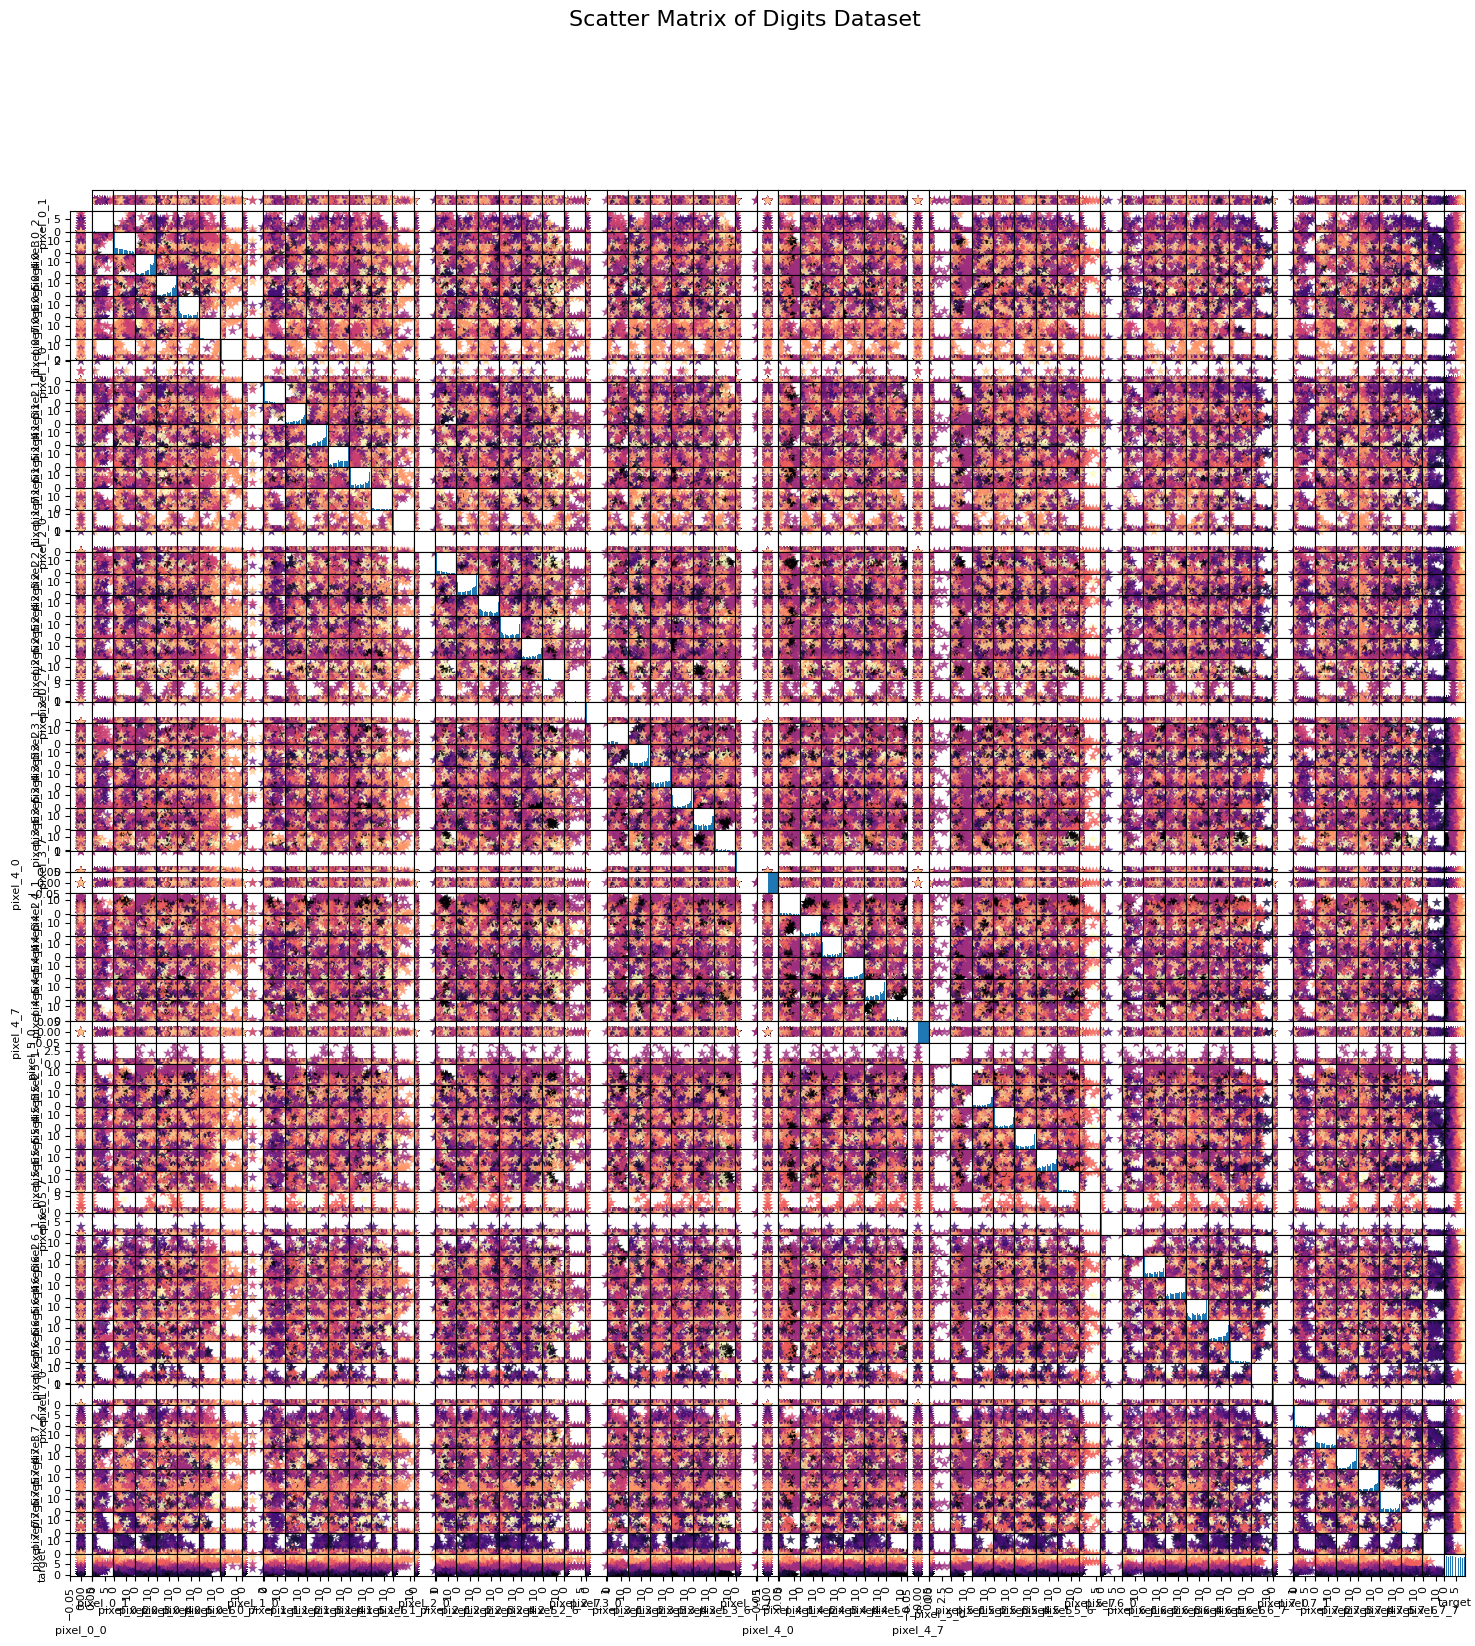

Accuracy: 0.9833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      0.97      0.99        35
           2       0.97      1.00      0.99        36
           3       0.93      0.97      0.95        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       1.00      1.00      1.00        44
           7       0.97      1.00      0.99        39
           8       1.00      0.95      0.97        39
           9       0.98      1.00      0.99        41

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Confusion Matrix:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  1  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 

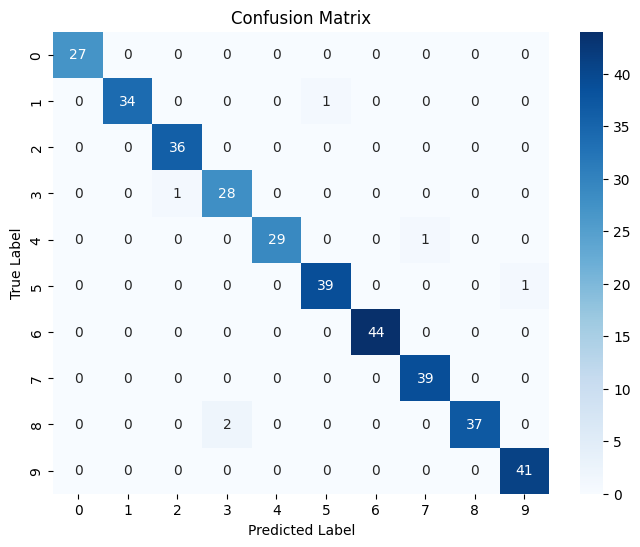

In [ ]:
plt.figure(figsize=(20, 20))
scatter_matrix_d = pd.plotting.scatter_matrix(digits_dataframe, c=y_train_d, figsize=(18, 18), marker='*', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap='magma')

for ax in scatter_matrix_d.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

plt.suptitle('Scatter Matrix of Digits Dataset', fontsize=16)
plt.show()

knn_d = KNeighborsClassifier(n_neighbors=3)
knn_d.fit(X_train_d, y_train_d)

y_pred_d = knn_d.predict(X_test_d)
print("Accuracy:", accuracy_score(y_test_d, y_pred_d))
print("\nClassification Report:\n", classification_report(y_test_d, y_pred_d))
print("Confusion Matrix:\n", confusion_matrix(y_test_d, y_pred_d))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_d, y_pred_d), annot=True, fmt='d', cmap='Blues',xticklabels=digits_dataset.target_names, yticklabels=digits_dataset.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

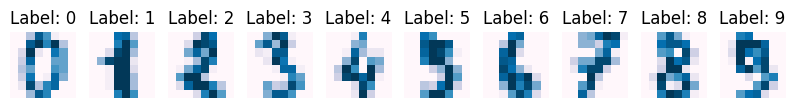

In [ ]:
# Визуализация первых 10 изображений из набора Digits
digits_dataset = datasets["Digits"]
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits_dataset.data[i].reshape(8, 8), cmap='PuBu')
    ax.set_title(f"Label: {datasets['Digits'].target[i]}")
    ax.axis('off')
plt.show()


### 4. Сравнительный анализ и **выводы**

##### На основании полученных результатов:
---
>Digits: **Точность: 98.33%**. Модель KNN продемонстрировала выдающуюся производительность, достигая высокой точности и сбалансированных показателей для всех классов. Это свидетельствует о том, что рукописные цифры были успешно классифицированы, и модель KNN хорошо подходит для данной задачи.
---
>Wine: **Точность: 77.78%**. Для набора данных по винам результаты оказались менее удовлетворительными. Хотя точность для первого класса была высокой, показатели для второго и третьего классов значительно снизились, что отражается в низких показателях precision и recall. Это указывает на то, что модель неэффективно классифицирует менее представленные классы.
---
> Breast Cancer: **Точность: 91.23%**. Модель KNN показала высокую точность и сбалансированные показатели для обоих классов. Высокие значения precision и recall свидетельствуют о том, что модель эффективно классифицирует как позитивные, так и негативные случаи, с низким уровнем ложных срабатываний. Это особенно важно в медицинских приложениях, где ошибки могут иметь серьезные последствия.
---

 1. Точность: Набор данных ```digits``` показал наивысшую точность (98.33%), что указывает на эффективность KNN в задачах с высокоразмерными данными, такими как изображения. ```breast_cancer``` также продемонстрировала хорошую производительность (91.23%), в то время как ```wine``` имела значительно более низкую точность (77.78%).

 2. Precision и Recall: Модель для набора данных по раку груди продемонстрировала сбалансированные значения precision и recall, что указывает на то, что она хорошо справляется с обоими классами. В то время как набор данных по винам показал неплохую точность для первого класса, но значительно снизил показатели для второго и третьего классов, что требует дополнительного внимания.

 3. Обработка классов: В то время как модели для ```digits``` и ```breast_cancer``` показали уверенные результаты во всех классах, набор данных ```wine``` требует доработки, чтобы улучшить классификацию менее представленных классов. Это может включать дополнительные шаги по предварительной обработке данных или использование более сложных алгоритмов.

Таким образом, метод k-ближайших соседей оказался эффективным для наборов данных ```breast_cancer``` и ```digits```, однако результаты по набору данных ```wine``` указывают на необходимость дополнительных исследований и улучшений.